In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from algorithms.generalised_delta import TwoLP

In [2]:
def f(x,y):
    return np.exp(-(x**2+y**2)/10)-0.5

def r_function(y):
    return -np.log(2/(y+1)-1)

In [3]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

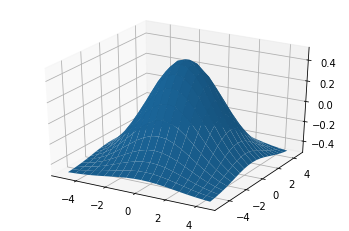

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()

In [5]:
tempX = X.reshape(1,400)
tempY = Y.reshape(1,400)
target = Z.reshape(400,)
data = np.concatenate((tempX,tempY),axis=0)

In [6]:
tlp = TwoLP(nodes_num=2, output_dim=1, features_num=3, lr=0.005)

In [7]:
tlp.train(data.T, target, epochs=400)

Epoch 0, MSE:0.12762559469344828
Epoch 1, MSE:0.11976802006605826
Epoch 2, MSE:0.10578419503137748
Epoch 3, MSE:0.08808335036698259
Epoch 4, MSE:0.06952297566166087
Epoch 5, MSE:0.05298421232570663
Epoch 6, MSE:0.0407480633009124
Epoch 7, MSE:0.03391210039268375
Epoch 8, MSE:0.032203242580993656
Epoch 9, MSE:0.034320484484376815
Epoch 10, MSE:0.03856374173442296
Epoch 11, MSE:0.04337769270660861
Epoch 12, MSE:0.04762465052817487
Epoch 13, MSE:0.05062320306531378
Epoch 14, MSE:0.05207105688297021
Epoch 15, MSE:0.05194374104840751
Epoch 16, MSE:0.05041027057875823
Epoch 17, MSE:0.0477726994176178
Epoch 18, MSE:0.044421432279922984
Epoch 19, MSE:0.04079461564607856
Epoch 20, MSE:0.037332362606884634
Epoch 21, MSE:0.034422761289246075
Epoch 22, MSE:0.03234521588529815
Epoch 23, MSE:0.031224748345836523
Epoch 24, MSE:0.031013693252736074
Epoch 25, MSE:0.031511157587779344
Epoch 26, MSE:0.03241735684725042
Epoch 27, MSE:0.03340671644657982
Epoch 28, MSE:0.03419799902213396
Epoch 29, MSE:0.03

In [8]:
#necessary to fit the data in the forward pass
data = data.T
data = np.c_[data, np.ones(data.shape[0])]
data = data.T
_, out = tlp.forward_pass(data)

In [9]:
Z2 = out.reshape(20,20)
#Z2 = r_function(Z2)

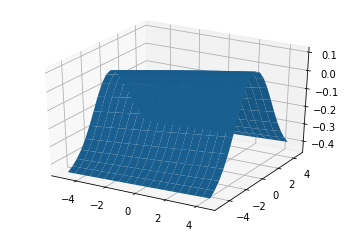

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z2)
plt.show()